In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [2]:
# Read Data 
data = pd.read_csv("milk_quality.csv")

In [3]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
# Get features
X= data.iloc[:,:-1]

In [5]:
# missing values
X[X.isna().any(axis=1)]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour


In [6]:
#Correlation
corr_matrix = X.corr().abs()

In [7]:
corr_matrix.style.background_gradient()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
pH,1.000000,0.244684,0.064053,0.081331,0.093429,0.048384,0.164565
Temprature,0.244684,1.000000,0.109792,0.048870,0.024073,0.185106,0.008511
Taste,0.064053,0.109792,1.000000,0.017582,0.324149,0.055755,0.082654
Odor,0.081331,0.048870,0.017582,1.000000,0.314505,0.457935,0.039361
Fat,0.093429,0.024073,0.324149,0.314505,1.000000,0.329264,0.114151
Turbidity,0.048384,0.185106,0.055755,0.457935,0.329264,1.000000,0.136436
Colour,0.164565,0.008511,0.082654,0.039361,0.114151,0.136436,1.000000


array([[<AxesSubplot:title={'center':'pH'}>]], dtype=object)

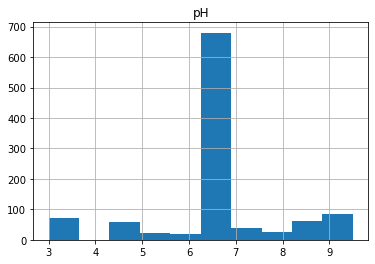

In [8]:
X.hist(column="pH")

array([[<AxesSubplot:title={'center':'Temprature'}>]], dtype=object)

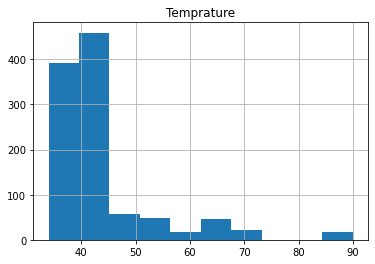

In [9]:
X.hist(column="Temprature")

array([[<AxesSubplot:title={'center':'Colour'}>]], dtype=object)

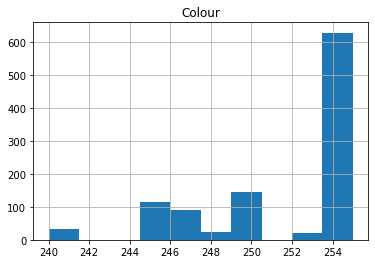

In [10]:
X.hist(column="Colour")

# Standardization 

In [14]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std

array([[-0.02153136, -0.91410734,  0.91050291, ...,  0.69960809,
        -0.98221664,  0.5016002 ],
       [-0.02153136, -0.81503461, -1.09829413, ..., -1.4293717 ,
         1.01810533,  0.26933321],
       [ 1.33656414,  2.55343832,  0.91050291, ...,  0.69960809,
         1.01810533, -1.35653574],
       ...,
       [-2.59476494, -0.41874368,  0.91050291, ...,  0.69960809,
         1.01810533,  0.73386719],
       [ 0.12142606, -0.12152548,  0.91050291, ...,  0.69960809,
        -0.98221664, -0.42746777],
       [ 1.40804285,  1.06734732, -1.09829413, ...,  0.69960809,
         1.01810533,  0.73386719]])

# CAH

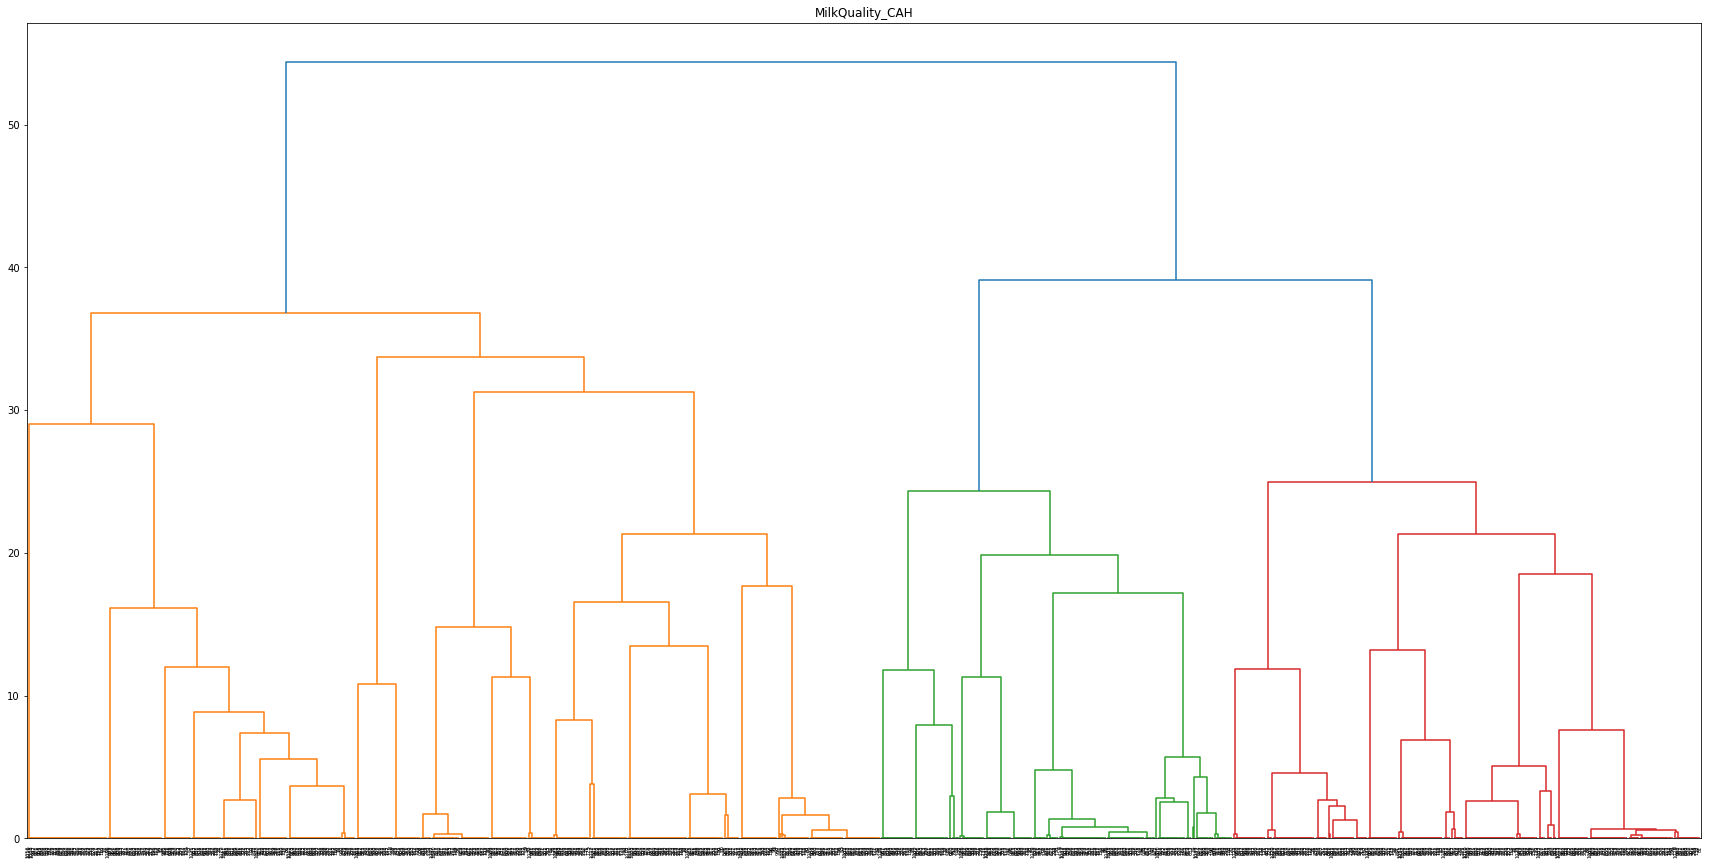

In [12]:
result = linkage(X_std, method='ward', metric='euclidean')
fig = plt.figure(figsize=(30, 15))
plt.title('MilkQuality_CAH')
dendrogram(result)
plt.show()

In [13]:
clust=fcluster(result, t=4, criterion='maxclust')
S= silhouette_samples(X_std, clust, metric='euclidean')
largeur_silhouette= silhouette_score(X_std, clust, metric='euclidean')
print(largeur_silhouette)

0.2491081078639217


# K means

In [16]:
# Random intialization
kmeans = KMeans(n_clusters=4, init='random').fit(X_std)
Idx=kmeans.labels_
#C=kmeans.cluster_centers_
S= silhouette_samples(X_std, Idx, metric='euclidean')
largeur_silhouette_R= silhouette_score(X_std, clust, metric='euclidean')
print("Largeur de silhouette :",largeur_silhouette_R)

Largeur de silhouette : 0.2491081078639217


In [17]:
# K means++ initialization
kmeans = KMeans(n_clusters=4, init='k-means++').fit(X_std)
Idx=kmeans.labels_
S= silhouette_samples(X_std, Idx, metric='euclidean')
largeur_silhouette_KM = silhouette_score(X_std, Idx, metric='euclidean')
print("Largeur de silhouette :",largeur_silhouette_KM)

Largeur de silhouette : 0.27773212394803337


# Elbow Method

For n_clusters=2, The Silhouette Coefficient is 0.23497774580930192
For n_clusters=3, The Silhouette Coefficient is 0.25256385997289266
For n_clusters=4, The Silhouette Coefficient is 0.27440830452250875
For n_clusters=5, The Silhouette Coefficient is 0.291723623906706
For n_clusters=6, The Silhouette Coefficient is 0.3155753012993363
For n_clusters=7, The Silhouette Coefficient is 0.32513061287694256
For n_clusters=8, The Silhouette Coefficient is 0.3829914982379129
For n_clusters=9, The Silhouette Coefficient is 0.40154398164968147
For n_clusters=10, The Silhouette Coefficient is 0.42233866979747825
For n_clusters=11, The Silhouette Coefficient is 0.4585420873110783
For n_clusters=12, The Silhouette Coefficient is 0.47020487377216497
For n_clusters=13, The Silhouette Coefficient is 0.4915545248520476
For n_clusters=14, The Silhouette Coefficient is 0.5188530704764271
For n_clusters=15, The Silhouette Coefficient is 0.5675707269584834
For n_clusters=16, The Silhouette Coefficient is 0

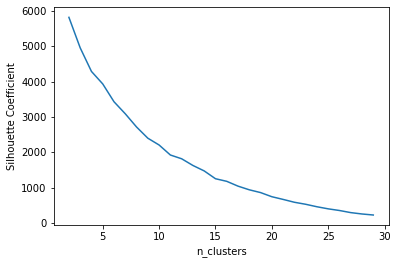

In [18]:
kM = {}
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(X_std)
    kM[k] = kmeans.inertia_ 
    label = kmeans.labels_
    sil_coeff = silhouette_score(X_std, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
plt.figure()
plt.plot(list(kM.keys()), list(kM.values()))
plt.xlabel("n_clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [20]:
kmeans = KMeans(n_clusters=20, init='k-means++').fit(X_std)
Idx=kmeans.labels_
S= silhouette_samples(X_std, Idx, metric='euclidean')
largeur_silhouette_KM = silhouette_score(X_std, Idx, metric='euclidean')
print("Largeur de silhouette :",largeur_silhouette_KM)

Largeur de silhouette : 0.6872431761770162


# PCA

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf 

,principal component 1,principal component 2
0,0.345935,-1.382269
1,-0.101817,0.296910
2,-1.543892,2.675939
3,-0.429635,0.732749
4,2.007367,-0.448641
...,...,...
1054,0.665386,-0.108584
1055,0.310114,-1.182038
1056,-2.190226,-1.911505
1057,0.463193,-0.652115


# CAH with PCA

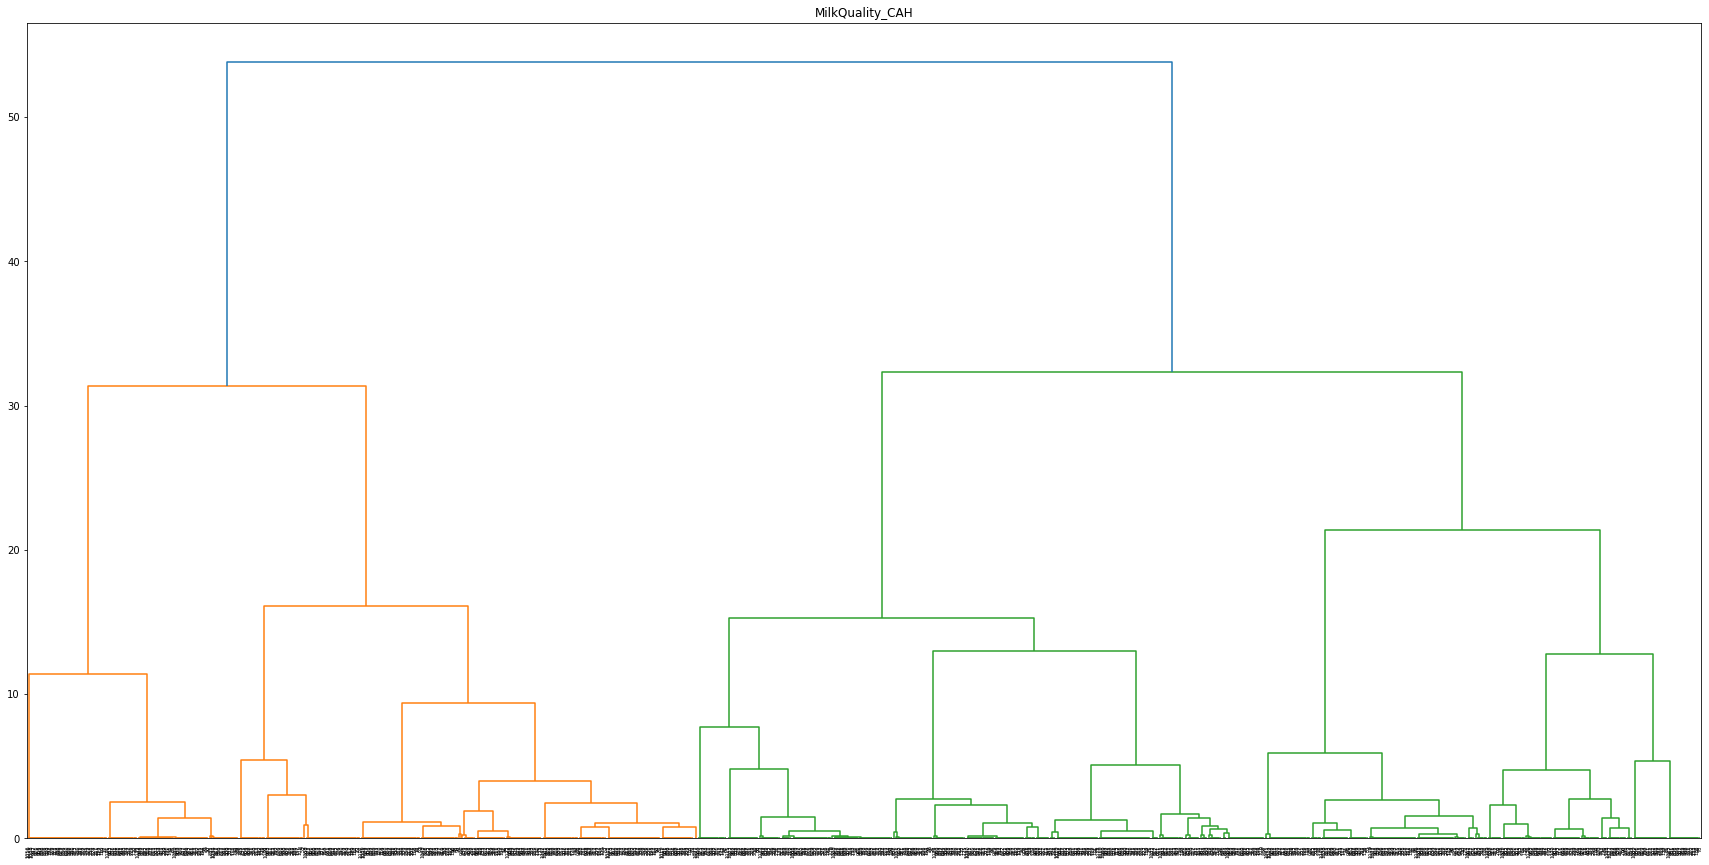

In [22]:
result = linkage(principalDf, method='ward', metric='euclidean')
fig = plt.figure(figsize=(30, 15))
plt.title('MilkQuality_CAH')
dendrogram(result)
plt.show()

In [23]:
clust=fcluster(result, t=4, criterion='maxclust')
S= silhouette_samples(principalComponents, clust, metric='euclidean')
largeurS= silhouette_score(principalComponents, clust, metric='euclidean')
print("Largeur de silhouette :",largeurS)

Largeur de silhouette : 0.45475279070764735


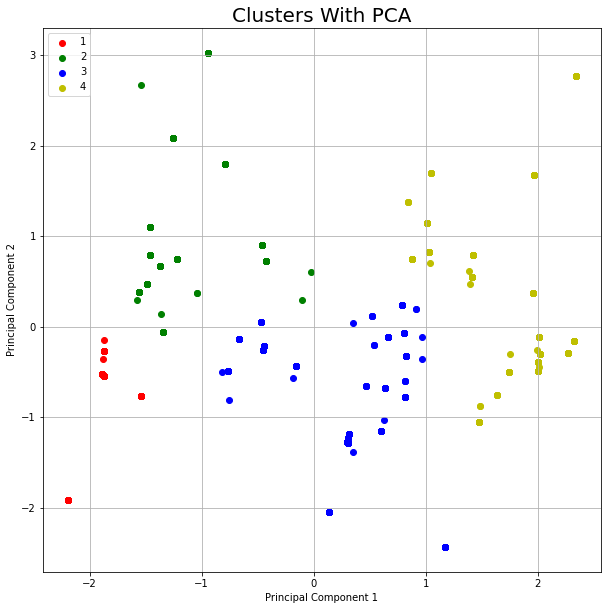

In [24]:
finalDf = pd.concat([principalDf, pd.DataFrame(clust,columns=['grade'])], axis = 1)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('Clusters With PCA', fontsize = 20)
targets = [1,2,3,4]
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['grade'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()

# Elbow Method with PCA

For n_clusters=2, The Silhouette Coefficient is 0.4536614557959627
For n_clusters=3, The Silhouette Coefficient is 0.40553820962958537
For n_clusters=4, The Silhouette Coefficient is 0.45613182428358345
For n_clusters=5, The Silhouette Coefficient is 0.4765084176512411
For n_clusters=6, The Silhouette Coefficient is 0.46926375439365764
For n_clusters=7, The Silhouette Coefficient is 0.5150008379007753
For n_clusters=8, The Silhouette Coefficient is 0.5395603509847275
For n_clusters=9, The Silhouette Coefficient is 0.5587101967965257
For n_clusters=10, The Silhouette Coefficient is 0.5974443522683847
For n_clusters=11, The Silhouette Coefficient is 0.646231728968823
For n_clusters=12, The Silhouette Coefficient is 0.6674019601555721
For n_clusters=13, The Silhouette Coefficient is 0.6733611227705583
For n_clusters=14, The Silhouette Coefficient is 0.6908251187762936
For n_clusters=15, The Silhouette Coefficient is 0.6954151088642085
For n_clusters=16, The Silhouette Coefficient is 0.706

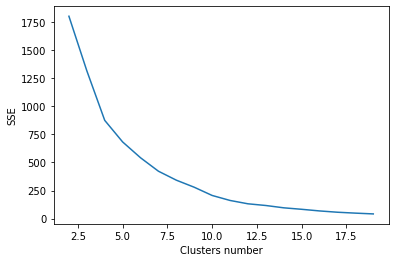

In [25]:
sse = {}
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(principalDf)
    sse[k] = kmeans.inertia_
    label = kmeans.labels_
    sil_coeff = silhouette_score(principalDf, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(k, sil_coeff))
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Clusters number")
plt.ylabel("SSE")
plt.show()

# Silhouette coefficient

In [26]:
kmeans = KMeans(n_clusters=8, init='k-means++').fit(principalDf)
Idx=kmeans.labels_
S= silhouette_samples(principalDf, Idx, metric='euclidean')
largeurSPCA= silhouette_score(principalDf, Idx, metric='euclidean')
print(largeurSPCA)

0.547040838250558


# Plot clusters distribution 

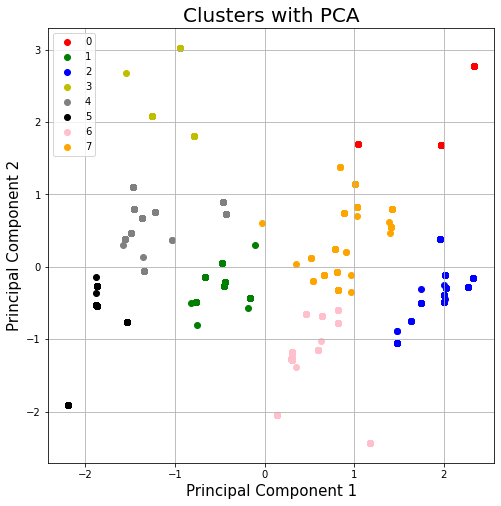

In [27]:
finalDf = pd.concat([principalDf, pd.DataFrame(Idx,columns=['grade'])], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Clusters with PCA', fontsize = 20)
targets = [0,1,2,3,4,5,6,7]
colors = ['r', 'g', 'b','y','gray','black','pink','orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['grade'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf 

,principal component 1,principal component 2
0,-9.237399,-2.090234
1,-8.222184,-1.107513
2,25.849925,5.762568
3,-10.135613,-2.912467
4,-7.239195,-3.098232
...,...,...
1054,0.789395,4.853185
1055,-6.240740,-3.102147
1056,-4.363198,-3.341944
1057,-1.216684,1.860946


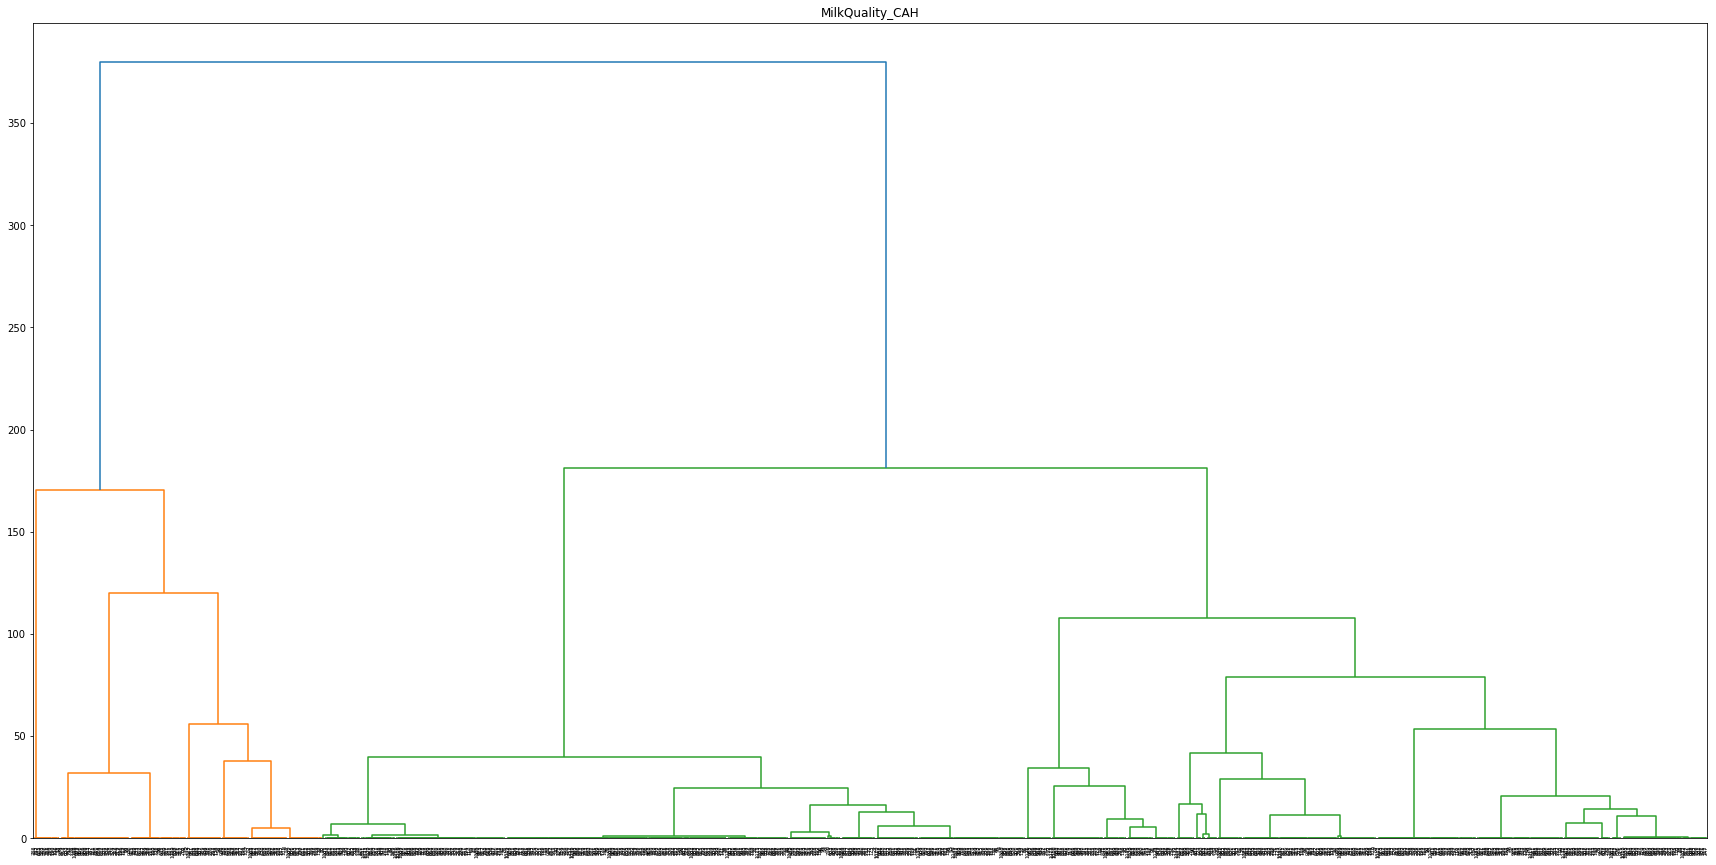

Largeur de silhouette : 0.5406858668868351


In [114]:
result = linkage(principalDf, method='ward', metric='euclidean')
fig = plt.figure(figsize=(30, 15))
plt.title('MilkQuality_CAH')
dendrogram(result)
plt.show()
clust=fcluster(result, t=4, criterion='maxclust')
S= silhouette_samples(principalComponents, clust, metric='euclidean')
largeurS= silhouette_score(principalComponents, clust, metric='euclidean')
print("Largeur de silhouette :",largeurS)

In [ ]:
finalDf = pd.concat([principalDf, pd.DataFrame(clust,columns=['grade'])], axis = 1)
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('Clusters With PCA', fontsize = 20)
targets = [1,2,3,4]
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['grade'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color)
ax.legend(targets)
ax.grid()